In [1]:
import numpy as np
import pandas as pd

In [2]:
banknote=pd.read_csv('BankNote_Authentication.csv')
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
banknote.shape

(1372, 5)

In [4]:
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
banknote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
banknote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# k-fold cross-validation of base model for the banknote dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [8]:
X, y = banknote.values[:, :-1], banknote.values[:, -1]

In [9]:
print(X.shape,y.shape)

(1372, 4) (1372,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(919, 4) (919,) (453, 4) (453,)


In [12]:
n_features = X.shape[1]

In [13]:
# define model
model = Sequential()
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test, y_test),verbose=1)

Epoch 1/50
29/29 [==============================] - 1s 11ms/step - loss: 0.6873 - accuracy: 0.6483 - val_loss: 0.6843 - val_accuracy: 0.6402
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5948 - val_loss: 0.6809 - val_accuracy: 0.6203
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5675 - val_loss: 0.6772 - val_accuracy: 0.5673
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5541 - val_loss: 0.6731 - val_accuracy: 0.5651
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5515 - val_loss: 0.6686 - val_accuracy: 0.5651
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5671 - val_loss: 0.6635 - val_accuracy: 0.5651
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5422 - val_loss: 0.6575 - val_accuracy: 0.5651
Epoch 8/50
29/29 [=

In [16]:
from  matplotlib import pyplot as plt
import seaborn as sns

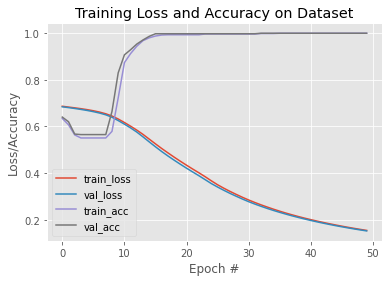

In [17]:
N = 50 # No. epochs 
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

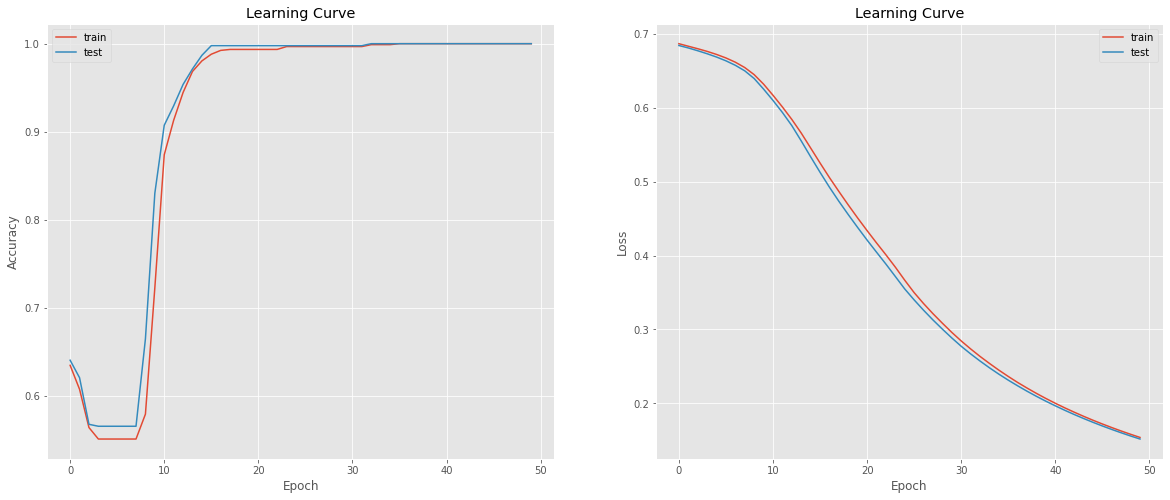

In [18]:
keys=['accuracy', 'loss']
plt.figure(figsize=(20,8))
for i, key in enumerate(keys):
    plt.subplot(1, 2, i + 1)
    sns.lineplot(x = history.epoch, y = history.history[key])
    sns.lineplot(x = history.epoch, y = history.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
#         plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
plt.show()

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 1.0000


[0.15175242722034454, 1.0]

In [21]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(X_test)

C:\Users\mural\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       256
         1.0       1.00      1.00      1.00       197

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

